# Wal-Mart Sales Forecasting

Midterm Project-
Sam Hale

### Exploratory Data Analysis

In [162]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
%matplotlib inline

In [163]:
df = pd.read_csv('Walmart_Sales_forecasting.csv')
df.head()
#shows higher sales on Valentine's Day Weekend 2010

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [149]:
df.tail(10)
#True on Labor Day Weekend 2010, no increase in sales

,Store,Dept,Date,Weekly_Sales,IsHoliday
421560,45,98,2012-08-24,415.40,False
421561,45,98,2012-08-31,346.04,False
421562,45,98,2012-09-07,352.44,True
421563,45,98,2012-09-14,605.96,False
421564,45,98,2012-09-21,467.30,False
421565,45,98,2012-09-28,508.37,False
421566,45,98,2012-10-05,628.10,False
421567,45,98,2012-10-12,1061.02,False
421568,45,98,2012-10-19,760.01,False
421569,45,98,2012-10-26,1076.80,False


In [146]:
df.shape
# observations, features

(421570, 5)

In [74]:
df.info

<bound method DataFrame.info of         Store  Dept        Date  Weekly_Sales  IsHoliday
0           1     1  2010-02-05      24924.50      False
1           1     1  2010-02-12      46039.49       True
2           1     1  2010-02-19      41595.55      False
3           1     1  2010-02-26      19403.54      False
4           1     1  2010-03-05      21827.90      False
5           1     1  2010-03-12      21043.39      False
6           1     1  2010-03-19      22136.64      False
7           1     1  2010-03-26      26229.21      False
8           1     1  2010-04-02      57258.43      False
9           1     1  2010-04-09      42960.91      False
10          1     1  2010-04-16      17596.96      False
11          1     1  2010-04-23      16145.35      False
12          1     1  2010-04-30      16555.11      False
13          1     1  2010-05-07      17413.94      False
14          1     1  2010-05-14      18926.74      False
15          1     1  2010-05-21      14773.04      False

In [147]:
df.dtypes
# Store/Dept/Weekly_Sales=numeric
# Date= categorical
# IsHoliday=true/false

Store             int64
Dept              int64
Date             object
Weekly_Sales    float64
IsHoliday          bool
dtype: object

In [80]:
df.columns

Index(['Store', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday'], dtype='object')

In [81]:
df.describe()

,Store,Dept,Weekly_Sales
count,421570.000000,421570.000000,421570.000000
mean,22.200546,44.260317,15981.258123
std,12.785297,30.492054,22711.183519
min,1.000000,1.000000,-4988.940000
25%,11.000000,18.000000,2079.650000
50%,22.000000,37.000000,7612.030000
75%,33.000000,74.000000,20205.852500
max,45.000000,99.000000,693099.360000


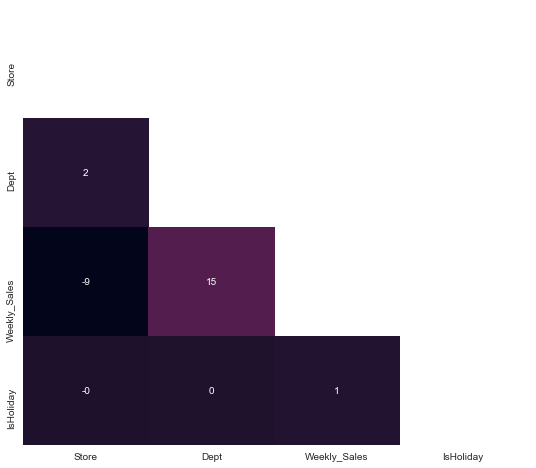

In [150]:
correlations = df.corr()
sns.set_style('white')
mask = np.zeros_like(correlations, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(9,8))
sns.heatmap(correlations*100, annot=True, fmt='.0f', mask=mask, cbar=False)
plt.show()

#IsHoliday and Store have 0 correlation
#Weekly_Sales and Dept have correlation

## Preprocessing/Data Cleaning

In [157]:
df.dropna()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False
5,1,1,2010-03-12,21043.39,False
6,1,1,2010-03-19,22136.64,False
7,1,1,2010-03-26,26229.21,False
8,1,1,2010-04-02,57258.43,False
9,1,1,2010-04-09,42960.91,False


C:\Users\saman\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


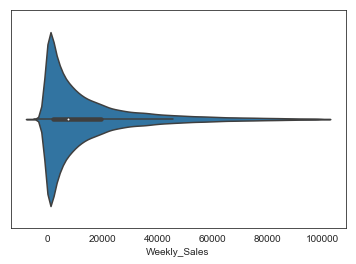

In [158]:
sns.violinplot(df.Weekly_Sales) #Potential Outlier

In [126]:
df.Weekly_Sales.sort_values(ascending=False).head()
#No alarming outliers

95373     693099.36
338013    649770.18
95425     630999.19
337961    627962.93
135665    474330.10
Name: Weekly_Sales, dtype: float64

In [155]:
df = df[df.Weekly_Sales <= 100000] #Remove Weekly_Sales Outliers #Does it make a difference? Nope

C:\Users\saman\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


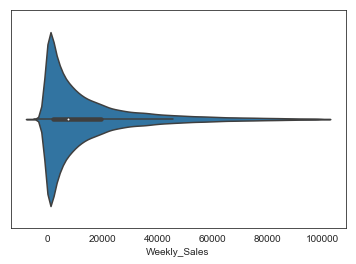

In [156]:
sns.violinplot(df.Weekly_Sales)

In [167]:
df.IsHoliday = df.IsHoliday.map({True:1, False:0}) #How many holidays vs not 
df.IsHoliday.value_counts()

0    391909
1     29661
Name: IsHoliday, dtype: int64

In [173]:
df.Store.tail() #Store is more categorical than numerical- could be Store A & Store B vs. Store 1 & Store 2

421565    45
421566    45
421567    45
421568    45
421569    45
Name: Store, dtype: int64

In [174]:
pd.get_dummies(df.Store).tail() #Creates 45 new columns for 45 stores

,1,2,3,4,5,6,7,8,9,10,...,36,37,38,39,40,41,42,43,44,45
421565,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
421566,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
421567,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
421568,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
421569,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [172]:
df.tail(2)

,Store,Dept,Date,Weekly_Sales,IsHoliday
421568,45,98,2012-10-19,760.01,0
421569,45,98,2012-10-26,1076.80,0


### Feature Engineering

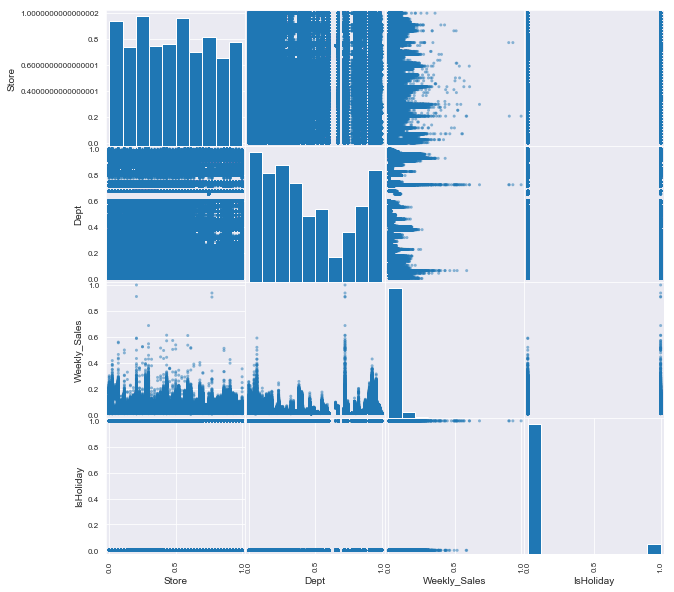

In [183]:
pd.plotting.scatter_matrix(df.drop('Date', axis=1), figsize=(10,10));

[[ 1.         -0.08519499]
 [-0.08519499  1.        ]]


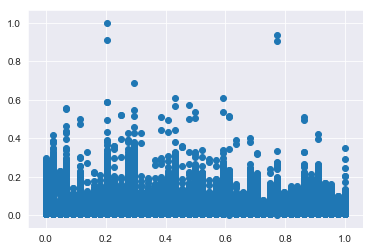

In [185]:
x , y = df.Store, df.Weekly_Sales #Correlation because not roughly equal amounts, not a high amount of skew
print(np.corrcoef(x,y))
plt.scatter(x,y)

### Regression

In [186]:
df.head(2)

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,0.0,0.0,2010-02-05,0.042851,0.0
1,0.0,0.0,2010-02-12,0.073097,1.0


In [188]:
df.columns

Index(['Store', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday'], dtype='object')

In [189]:
df = df.dropna()

In [192]:
from sklearn.linear_model import LinearRegression

# Define X and y
X = df[['Store', 'Dept', 'IsHoliday']] #Only numeric features work so did not include Dates because Bool

y = df['Weekly_Sales']

# Initialize a regression object
linreg = LinearRegression()
#  Fit the model
linreg.fit(X, y)
# Use the model to predict outputs
df['Estimated_Weekly_Sales'] = linreg.predict(X)

# Measure performance
# Here we print the model's R^2 to measure overall performance; the correlation between our model and the data
print('R^2 model score:', linreg.score(X,y), '\n')

#Print the coefficients for the model's formula
print('Model feature coefficients:')
weight_dict = dict(zip(X.columns, linreg.coef_))
for feat, coeff in list(zip(X.columns, linreg.coef_)):
    print(feat, 'Coefficient weight: {}'.format(round(coeff, 4)))

R^2 model score: 0.02995275079897286 

Model feature coefficients:
Store Coefficient weight: -0.0099
Dept Coefficient weight: 0.0157
IsHoliday Coefficient weight: 0.0016


In [202]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_squared_log_error

features = [col for col in df.columns if df[col].dtype in [np.float64, np.int64] and col!='Weekly_Sales']
X = df[features]
#Impute null values
for col in X:
#     avg = X[col].mean()
    X[col] = X[col].fillna(value=0)
y = df.Weekly_Sales

X_train, X_test, y_train, y_test = train_test_split(X,y)
ols = LinearRegression()
ols.fit(X_train, y_train)
print('Training r^2:', ols.score(X_train, y_train))
print('Testing r^2:', ols.score(X_test, y_test))
print('Training MSE:', mean_squared_error(y_train, ols.predict(X_train)))
print('Testing MSE:', mean_squared_error(y_test, ols.predict(X_test)))

C:\Users\saman\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


Training r^2: 0.02984851813787759
Testing r^2: 0.030231150160954234
Training MSE: 0.0010320258372744392
Testing MSE: 0.0010108200100949062


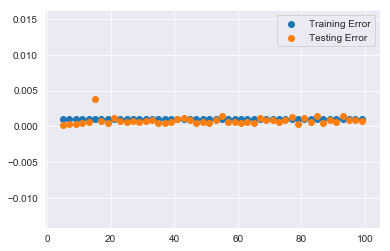

In [205]:
train_err = [] #calculating both the training error and the test error (mse) for each of these splits
test_err = []
t_sizes = list(range(5,100,2))
for t_size in t_sizes:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=t_size)
    linreg.fit(X_train, y_train)
    y_hat_train = linreg.predict(X_train)
    y_hat_test = linreg.predict(X_test)
    train_err.append(mean_squared_error(y_train, y_hat_train))
    test_err.append(mean_squared_error(y_test, y_hat_test))
plt.scatter(t_sizes, train_err, label='Training Error')
plt.scatter(t_sizes, test_err, label='Testing Error')
plt.legend()

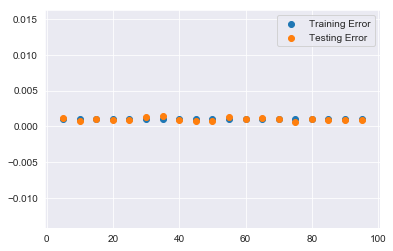

In [207]:
train_err = [] #Generating at least 3 iterations of models/errors to help account for any particularly 
#good/bad models that might result by random chance from those samples.
test_err = []
t_sizes = list(range(5,100,5))
for t_size in t_sizes:
    temp_train_err = []
    temp_test_err = []
    for i in range(8):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=t_size)
        linreg.fit(X_train, y_train)
        y_hat_train = linreg.predict(X_train)
        y_hat_test = linreg.predict(X_test)
        temp_train_err.append(mean_squared_error(y_train, y_hat_train))
        temp_test_err.append(mean_squared_error(y_test, y_hat_test))
    train_err.append(np.mean(temp_train_err))
    test_err.append(np.mean(temp_test_err))
plt.scatter(t_sizes, train_err, label='Training Error')
plt.scatter(t_sizes, test_err, label='Testing Error')
plt.legend()

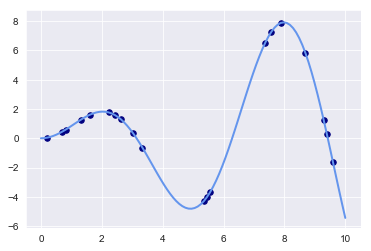

In [222]:
#Add polynomial features #Generate sample data
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline


def f(x):
    """ function to approximate by polynomial interpolation"""
    return x * np.sin(x)


# generate points used to plot
x_plot = np.linspace(0, 10, 100)

# generate points and keep a subset of them
x = np.linspace(0, 10, 100)
rng = np.random.RandomState(0)
rng.shuffle(x)
x = np.sort(x[:20])
y = f(x)

# create matrix versions of these arrays
X = x[:, np.newaxis]
X_plot = x_plot[:, np.newaxis]

colors = ['teal', 'yellowgreen', 'gold']
lw = 2
plt.plot(x_plot, f(x_plot), color='cornflowerblue', linewidth=lw,
         label="ground truth")
plt.scatter(x, y, color='navy', s=30, marker='o', label="training points")

In [223]:
X

array([[0.2020202 ],
       [0.70707071],
       [0.80808081],
       [1.31313131],
       [1.61616162],
       [2.22222222],
       [2.42424242],
       [2.62626263],
       [3.03030303],
       [3.33333333],
       [5.35353535],
       [5.45454545],
       [5.55555556],
       [7.37373737],
       [7.57575758],
       [7.87878788],
       [8.68686869],
       [9.29292929],
       [9.39393939],
       [9.5959596 ]])

In [224]:
x

array([0.2020202 , 0.70707071, 0.80808081, 1.31313131, 1.61616162,
       2.22222222, 2.42424242, 2.62626263, 3.03030303, 3.33333333,
       5.35353535, 5.45454545, 5.55555556, 7.37373737, 7.57575758,
       7.87878788, 8.68686869, 9.29292929, 9.39393939, 9.5959596 ])

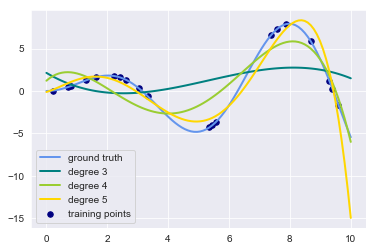

In [225]:
#Modeling with Successive Polynomials

import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline


def f(x):
    """ function to approximate by polynomial interpolation"""
    return x * np.sin(x)

# generate points used to plot
x_plot = np.linspace(0, 10, 100)

# generate points and keep a subset of them
x = np.linspace(0, 10, 100)
rng = np.random.RandomState(0)
rng.shuffle(x)
x = np.sort(x[:20])
y = f(x)

# create matrix versions of these arrays
X = x.reshape(-1,1)
X_plot = x_plot.reshape(-1, 1)
# [:, np.newaxis]
# X_plot = x_plot[:, np.newaxis]

colors = ['teal', 'yellowgreen', 'gold']
lw = 2
plt.plot(x_plot, f(x_plot), color='cornflowerblue', linewidth=lw,
         label="ground truth")
plt.scatter(x, y, color='navy', s=30, marker='o', label="training points")

for count, degree in enumerate([3, 4, 5]):
    model = make_pipeline(PolynomialFeatures(degree), Ridge())
    model.fit(X, y)
    y_plot = model.predict(X_plot)
    plt.plot(x_plot, y_plot, color=colors[count], linewidth=lw,
             label="degree {}".format(degree))

plt.legend(loc='lower left')

plt.show()

In [226]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split

In [227]:
df = pd.read_csv('Walmart_Sales_Forecasting.csv')
print(len(df))
df.head()

421570


,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False
